# Programmieraufgabe 6: Das Newton-Verfahren 

In [220]:
# some setup
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

In dieser Aufgabe werden wir das Newton-Verfahren (in einer Dimension) implementieren und an einigen Beispielen testen. Für eine differenzierbare Funktion $f: \mathbb{R} \rightarrow \mathbb{R}$ ist das Newtonverfahren mit Startwert $x_0$ durch folgende Iterationsvorschrift definiert: 

$x_{n+1} = N(x_n) := x_n - \frac{f(x_n)}{f'(x_n)}$

Zumindest die Aufgaben a),b),c),e) und f) sollten damit auch ohne theoretisches Vorwissen aus der Mittwochs-Vorlesung bearbeitet werden können. 

a) Implementieren Sie das Newton-Verfahren in einer Funktion "newton", die als Parameter eine Funktion $f$, deren Ableitung $f'$ sowie einen Startwert $x_0$, eine Schranke $itmax$ für die Anzahl der Iterationen sowie eine gewünschte Genauigkeit $\varepsilon$ erhält. Ausgegeben werden soll die letzte Iterierte, ein array, das alle Iterierten enthält, sowie ein Boolwert, der "Erfolg" oder "Nicht Erfolg" anzeigt. Dabei soll das Verfahren erfolgreich abbrechen, wenn eine Iterierte $x_n$ die Bedingung $\lvert f(x_n)/f'(x_n) \rvert < \varepsilon$ erfüllt bzw. andernfalls erfolglos abbrechen, wenn $itmax$-viele Iterationen durchgeführt wurden. 

In [221]:
def newton(f, df, x0, itmax, epsilon):
    
    # to be done... 
    success=False 
    xarray=[]
    x=x0
    xarray.append(x)
    for i in range(itmax):
        if abs(f(x)/df(x))<epsilon: #check if given criteria is met, aka we are close to zero
            success=True
            break
        else:
            x=x-f(x)/df(x) #set x to next iteration
            xarray.append(x) #store new x in xarray
        
    
    return x, xarray, success 

#my own testingdata
#def f(x):
 #   return x*x-2
#print(f(2))
#def df(x):
#    return 2*x#

#lsg=newton(f,df,2,100,0.0000000001)
#print(lsg)

b) Man implementiere eine Funktion, die für eine gegebene Funktion $f$ und ein array von Startwerten jeweils maximal $itmax$ Newton-Iterationen mit Abbruchgenauigkeit $\epsilon$ für $f$ durchführt. Ausgegeben werden sollen zwei Arrays: eines, das jeweils die letzte Iterierte enthält, sowie eines, das "1" for Konvergenz bzw. "0" für Nicht-Konvergenz enthält. 


In [222]:
#Ich gehe hier davon aus, dass mit konvergenz bzw nicht konvergenz in der aufgabe gemeint war,
#ob das Abbruchkriterium erreicht wurde, oder nicht, da die konvergenz von newton-iterationen
#eine lokal bedingte eigenschaft ist

def p(x):
    return x**3 - 2*x + 2
def dp(x):
    return 3*x**2 - 2 

def newton_test(f, df, startarray, itmax, epsilon):

    # to be done ... 
    xfinalarray=[] #initialize the lists
    successarray=[]
    for x0 in startarray: #go through all entries in startarray
        xfinal,trash,xsuccess=newton(f,df,x0,itmax,epsilon)
        
        xfinalarray.append(xfinal)
        successarray.append(xsuccess)
    
    return xfinalarray, successarray 


#my own testing data
#startarray=[-2,-1,1,2,500]
#print(newton_test(f,df,startarray,20,0.0000000001))

c) Untersuchen Sie mit Hilfe Ihrer Funktion aus b) das Verhalten des Newton-Verfahrens für $p(x) = x^3 - 2x + 2$ für Startwerte aus dem Intervall $[-3,3]$. Veranschaulichen Sie Ihre Ergebnisse mit geeigneten Graphiken und beschreiben Sie das beobachtete Verhalten. 

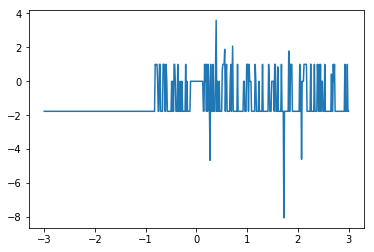

In [223]:
# Ein mögliches Array mit Startenwerten. Ggf. kann die Anzahl der Punkte noch erhöht werden...  
startarray = np.linspace(-3,3,500)
itmax = 50
epsilon = 1e-5

    # to be done ... 
graph_p=[p(x) for x in startarray]
xres,xconv=newton_test(p,dp,startarray,itmax,epsilon)
plt.plot(startarray,xres)
#plt.plot(startarray,graph_p)
plt.show()



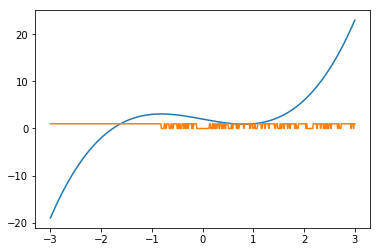

In [224]:
plt.plot(startarray,graph_p)
plt.plot(startarray,xconv)
plt.show()

#in this plot we see, that for x0>=1 it kind of depends on luck, wether we end up at the right place,
#which is a result of of the lokal minimum at x=ca 1 

d) Untersuchen Sie für die folgenden Funktionen $f_i$ und Startwerte $x_0$ jeweils das Konvergenzverhalten des Newton-Verfahrens: Plotten Sie dazu jeweils den Verlauf der Fehler $\lvert x_n - x^* \rvert$, wobei $x_n$ die $n$-te Iterierte und $x^*$ die tatsächliche Nullstelle darstellt. Verwenden Sie eine Form der Darstellung, aus der sich die Konvergenzordnung ablesen lässt! Interpretieren Sie die Ergebnisse. 

d.i)  $f_1(x) := x^3 - 2x^2 + x$,   $x_0 = 2$,   $x^* = 1$.

d.ii) $f_1(x)$ aber mit $x_0 = -1$ und $x^* = 0$.

d.iii) $f_2(x) := exp(-1/x^2)$,   $x_0 = 1/2$,   $x^* = 0$.

<function matplotlib.pyplot.show>

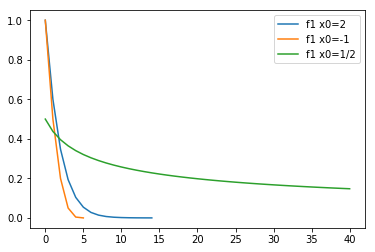

In [225]:
# to be done... 
#i)
def f1(x):
    return x**3-2*x*x+x

def df1(x):
    return 3*x*x-4*x+1

trash1,xarray1,success1=newton(f1,df1,2,40,0.0001)

x_axis=[x for x in range (len(xarray1))]
abs_mist=[abs(x-1) for x in xarray1]

trash2,xarray2,success2=newton(f1,df1,-1,40,0.0001)
x_axis2=[x for x in range (len(xarray2))]
abs_mist2=[abs(x) for x in xarray2]

def f2(x):
    return np.exp(-1/(x*x))
def df2(x):
    return 2*np.exp(-1/(x*x))/x**3

trash3,xarray3,success3=newton(f2,df2,1/2,40,0.0001)
x_axis3=[x for x in range (len(xarray3))]
abs_mist3=[abs(x) for x in xarray3]

plt.plot(x_axis,abs_mist, label='f1 x0=2')
plt.plot(x_axis2,abs_mist2, label='f1 x0=-1')
plt.plot(x_axis3,abs_mist3, label='f1 x0=1/2')
plt.legend()
plt.show

#we see that speed of convergence is quite different. the slower convergence towards the root at x=1 
#with staring point x0=2 is due to f1 only touching the x axis in x=1
#f2 is somewhat similar aside from f2 not really having a root and dw being almost 0 for all values around zero

e) Das Wilkonson-Polynom ist definiert als $w(x) = \prod_{k=0}^{20} (x-k)$.

Schreiben Sie funktionen "w" und "dw", die das Wilkinson-Polynom sowie seine erste Ableitung an der Stelle $x$ auswerten.



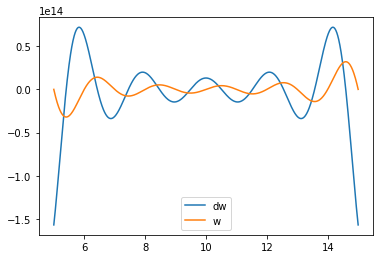

In [226]:
def w(x):

        # to be done ...
    return np.prod([x-k for k in range(0,21)]) #multiply all given values
    
    
def dw(x):

        # to be done ...
    #to understand why this is the derivative check wikipedia "product rule"
    array=np.zeros(21)
    for i in range(21):
        array[i]=np.prod([x-k for k in range(i)])*np.prod([x-k for k in range(i+1,21)])
    return np.sum(array)


#I wanted to confirm visually, that dw is correct
b=np.linspace(5,15,1000)
wv=[w(x) for x in b]
dwv=[dw(x) for x in b]

plt.plot(b,dwv,label='dw')
plt.plot(b,wv,label='w')
plt.legend()
plt.show()



f) Finden Sie experimentell jeweils einen Startwert $x_0$, für den das Newton-Verfahren angewandt auf $w$ gegen $x^* = 20$ bzw. $x^* = 6$ konvergiert. Betrachten Sie anschließend $\tilde{w} = w(x) + \delta \cdot x^{19}$ für kleines $\delta > 0$. Wie verhält sich das Newton-Verfahren angewandt auf $\tilde{w}$ für die beiden Startwerte? Was passiert wenn $\delta$ immer kleiner wird?


In [227]:
## Bestimme x_0 sodass Konvergenz gegen x^* = 20 bzw. 6 eintritt...  

            # to be done...
it=0 #to count iterations (so the function terminates and so we can see, how long it took)
xupw20=19.2 #x upwards 20
while it<10000:
    finalx,trash1,trash2=newton(w,dw,xupw20,30,0.00001)
    if abs(finalx-20)<0.001:
        break
    else:
        it+=1
        xupw20+=0.001
print(xupw20,finalx,it)

it=0
xdow20=20.9
while it<10000:
    finalx,trash1,trash2=newton(w,dw,xdow20,30,0.00001)
    if abs(finalx-20)<0.001:
        break
    else:
        it+=1
        xdow20-=0.001
        
print(xdow20,finalx,it)

it=0
xupw6=5.2 #x upwards 6
while it<10000:
    finalx,trash1,trash2=newton(w,dw,xupw6,30,0.00001)
    if abs(finalx-6)<0.001:
        break
    else:
        it+=1
        xupw6+=0.001
print(xupw6,finalx,it)

it=0
xdow6=6.9
while it<10000:
    finalx,trash1,trash2=newton(w,dw,xdow6,30,0.00001)
    if abs(finalx-6)<0.001:
        break
    else:
        it+=1
        xdow6-=0.001
        
print(xdow6,finalx,it)
    
    

19.686000000000593 20.000000026318315 486
20.9 20.000000001019753 0
5.308000000000036 5.999999856071241 108
6.5559999999998855 5.999999995767243 344


In [228]:
## Definiere das gestörte Wilkinson-Polynom für Störungsparameter delta
delta = 1e-4
def wtilde(x): 
    return w(x) + delta*x**19 

def dwtilde(x): 
    return dw(x) + 19*delta*x**18

## Newton-Verfahren für gestörtes Wilkinson-Polynom: 

            # to be done...
print(newton(wtilde,dwtilde,xupw20,30,0.00001))
print(newton(wtilde,dwtilde,xdow20,30,0.00001))
print(newton(wtilde,dwtilde,xupw6,30,0.00001))
print(newton(wtilde,dwtilde,xdow20,30,0.00001))

#we see, that the roots of the function have changed drastically despite the seemingly minor chonge to the coefficients
#now three of the four starting values converge towards a new root at roughly 7.6564.
#it is also to be noted, that the root at 6 still seems to exist

(7.656475522589078, [19.686000000000593, 18.649822907498095, 17.668223497832212, 16.738351136506736, 15.857348748953665, 15.022792289754205, 14.232075323024041, 13.48305235907153, 12.773430950698877, 12.101031319382974, 11.46431644863917, 10.861073316106173, 10.288360051589086, 9.747247604223638, 9.24073018000389, 8.750658733476744, 8.235228060255395, 7.820802102935922, 7.681013035366184, 7.657297258698083, 7.656475522589078], True)
(7.656480063309558, [20.9, 19.89122621002068, 18.846927117087905, 17.854658543432105, 16.915048293883785, 16.02471961543292, 15.181360721266438, 14.382306331531668, 13.625354440465511, 12.908270115855995, 12.22877560221805, 11.585255146407297, 10.975761308130538, 10.397239726885088, 9.84961310011936, 9.336720172009294, 8.846656717143457, 8.337073178264497, 7.876202324068541, 7.6950129506854035, 7.6584100483981, 7.656480063309558], True)
(5.999032751033633, [5.308000000000036, 4.4767817498861, 5.542685456443432, 6.293755934267946, 5.690341768537413, 6.021690